In [174]:
import pandas as pd
import numpy as np

In [204]:
df = pd.read_excel('../03.신영화/data/106_DT_106N_03_0200070_20231215115726.xls', header=None)
df.head(5)

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [198]:
# '구분(2)' 컬럼이 있는지 확인
if '구분(2)' not in df.columns:
    raise KeyError("'구분(2)' 컬럼이 존재하지 않습니다.")

In [196]:
#  구분(2) 행을 컬럼으로 지정
new_header = df.iloc[0]
df = df[1:]  # 3번째 행부터 데이터로 사용
df.columns = new_header
df.head(5)

,구분(1),구분(2),2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
1,총계,소계,0.028,0.026,0.028,0.023,0.023,0.019,0.015,0.017,...,0.017,0.013,0.011,0.009,0.009,0.009,0.01,0.013,0.019,0.019
2,서울특별시,서울특별시,0.037,0.036,0.04,0.033,0.032,0.025,0.021,0.023,...,0.026,0.02,0.015,0.013,0.014,0.013,0.016,0.02,0.028,0.028
3,부산광역시,부산광역시,0.022,0.02,0.021,0.019,0.025,0.019,0.016,0.018,...,0.018,0.016,0.015,0.01,0.012,0.011,0.01,0.013,0.019,0.017
4,대구광역시,대구광역시,0.031,0.026,0.027,0.019,0.018,0.016,0.014,0.016,...,0.018,0.013,0.011,0.008,0.008,0.009,0.01,0.014,0.025,0.023
5,인천광역시,인천광역시,0.03,0.029,0.033,0.03,0.026,0.022,0.018,0.017,...,0.024,0.018,0.014,0.012,0.012,0.011,0.015,0.019,0.026,0.024


c:\Users\human\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


KeyError: "['2022.12'] not in index"

In [197]:
# 년도와 월을 나타내는 컬럼명 리스트 생성
columns_to_keep = [f"구분(2)"] + [f"{year}.{month:02d}" for year in range(2018, 2023) for month in range(1, 13)]

# 원하는 컬럼만 남기기
df_filtered = df[columns_to_keep]

# '구분(2)' 컬럼을 인덱스로 설정
df_filtered.set_index('구분(2)', inplace=True)

df_filtered.head(5)

KeyError: "['2022.12'] not in index"

In [190]:
# 소계 행만 남기고 나머지 행을 삭제합니다.
df_filtered = df_filtered.iloc[[0]]
df_filtered

,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.10,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
구분(2),,,,,,,,,,,,,,,,,,,,,
소계,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.003,0.003,...,0.003,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.003,0.003


In [185]:
df_filtered.to_csv('data/아황산가스_2.csv', index=True)

In [133]:
df = pd.read_csv('data/pm25_2.csv')

In [134]:
df

,구분(2),2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,32,30,31,25,22,24,17,12,13,...,22,19,17,12,13,10,11,14,23,20


In [135]:
# 'PM2_BAD' 행 추가
df.loc['PM2_BAD'] = df.apply(lambda row: 'Y' if pd.to_numeric(row.iloc[2:], errors='coerce').sum() > 35 else 'N', axis=1)

df

,구분(2),2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,32.0,30.0,31.0,25.0,22.0,24.0,17.0,12.0,13.0,...,22.0,19.0,17.0,12.0,13.0,10.0,11.0,14.0,23.0,20.0
PM2_BAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# 각 컬럼에 대해 소계값 확인하여 'PM2_BAD' 행 갱신
# 소계의 값이 35 이하이거나 NaN이면 'N', 35 초과면 'Y'를 'PM2_BAD' 열에 할당

for col in df.columns[2:]:
    df.loc['PM2_BAD', col] = 'Y' if pd.to_numeric(df[col], errors='coerce').sum() > 35 else 'N'


In [137]:
df

,구분(2),2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,32.0,30.0,31.0,25.0,22.0,24.0,17.0,12.0,13.0,...,22.0,19.0,17.0,12.0,13.0,10.0,11.0,14.0,23.0,20.0
PM2_BAD,NaN,NaN,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


In [138]:
import matplotlib.pyplot as plt


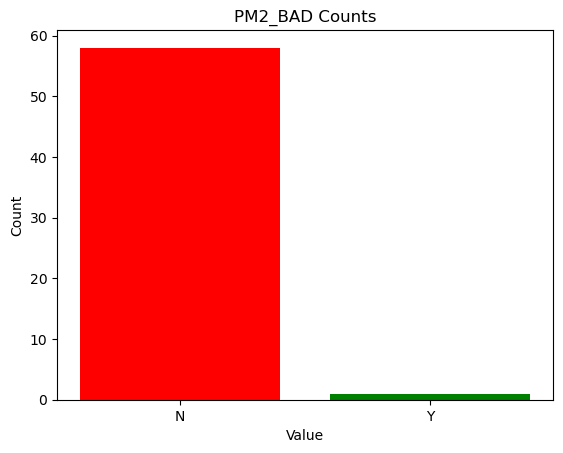

In [139]:
# 'PM2_BAD' 행을 추출하여 시각화
pm2_bad_row = df.loc['PM2_BAD']
pm2_bad_counts = pm2_bad_row.value_counts()

# 막대 그래프 생성
plt.bar(pm2_bad_counts.index, pm2_bad_counts.values, color=['red', 'green'])
plt.title('PM2_BAD Counts')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [262]:
df2 = pd.read_excel('data/심근경색증.xlsx', header=None)
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,"국민관심질병_성별입원외래별현황(단위_명, 일, 건, 천원)_201801_202012",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,진료년월,2018년 01월,NaN,NaN,NaN,NaN,2018년 02월,NaN,...,2022년 11월,NaN,NaN,NaN,NaN,2022년 12월,NaN,NaN,NaN,NaN
3,항목,성별구분,입원외래구분,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수,내원일수,...,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금
4,심근경색증,계,계,28712,60081,34299,31183250,28450709,26236,51494,...,34193,60722,40658,38098999,33832470,33895,58343,40235,36262065,32227603


In [263]:
# 진료년월 행을 컬럼으로 지정
new_header = df2.iloc[2]
df2 = df2[3:]  # 3번째 행부터 데이터로 사용
df2.columns = new_header
df2.head(5)

2,NaN,NaN,진료년월,2018년 01월,NaN,NaN,NaN,NaN,2018년 02월,NaN,...,2022년 11월,NaN,NaN,NaN,NaN,2022년 12월,NaN,NaN,NaN,NaN
3,항목,성별구분,입원외래구분,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수,내원일수,...,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금
4,심근경색증,계,계,28712,60081,34299,31183250,28450709,26236,51494,...,34193,60722,40658,38098999,33832470,33895,58343,40235,36262065,32227603
5,심근경색증,남,소계,21965,41631,26196,23043255,21089540,20120,36317,...,27119,45546,32137,29537111,26266137,26925,44147,32003,28382753,25246107
6,심근경색증,남,입원,2378,18237,2746,22064998,20679068,1930,15170,...,2180,16146,2645,27601806,25456112,2243,14925,2737,26468236,24446874
7,심근경색증,남,외래,20644,23394,23450,978257,410472,18905,21147,...,25763,29400,29492,1935305,810025,25533,29222,29266,1914516,799233


In [264]:
# NaN 값을 다른 값으로 대체합니다.
df2.columns = df2.columns.fillna('')

# "월"이라는 단어가 포함된 컬럼만 남기고 나머지는 삭제합니다.
df2 = df2[df2.columns[df2.columns.str.contains('월')]]

In [265]:
# 첫 번째 열을 인덱스로 설정합니다.
df2 = df2.set_index(df2.columns[0])
df2.head(5)

2,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월,2018년 10월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
진료년월,,,,,,,,,,,,,,,,,,,,,
입원외래구분,환자수,환자수,환자수,환자수,환자수,환자수,환자수,환자수,환자수,환자수,...,환자수,환자수,환자수,환자수,환자수,환자수,환자수,환자수,환자수,환자수
계,28712,26236,29573,28229,29161,27698,30015,28904,26353,31645,...,34033,32666,33398,32194,32933,33544,33659,31601,34193,33895
소계,21965,20120,22580,21629,22346,21244,22975,22159,20133,24261,...,26878,25686,26323,25363,25975,26554,26611,24928,27119,26925
입원,2378,1930,2130,2125,2010,1878,2028,1915,1821,2120,...,2126,2147,2264,2062,2120,2079,2109,2203,2180,2243
외래,20644,18905,21327,20367,21155,20110,21813,21053,18993,23014,...,25654,24375,24975,24100,24704,25353,25374,23554,25763,25533


In [266]:
# "진료년월"이라는 이름의 인덱스를 삭제합니다.
df2 = df2.reset_index(drop=True)

In [267]:
# 두 번째 행만 남기고 나머지 행을 삭제합니다.
df2 = df2.iloc[[1]]
df2

2,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월,2018년 10월,...,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
1,28712,26236,29573,28229,29161,27698,30015,28904,26353,31645,...,34033,32666,33398,32194,32933,33544,33659,31601,34193,33895


In [268]:
# 년월 컬럼을 .으로 바꾸기
# 컬럼명 변경
df2.columns = df2.columns.str.replace('년', '.').str.replace('월', '')
df2.columns = df2.columns.str.replace(' ', '')

df2


2,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.10,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
1,28712,26236,29573,28229,29161,27698,30015,28904,26353,31645,...,34033,32666,33398,32194,32933,33544,33659,31601,34193,33895


In [269]:
# 변경된 데이터프레임을 'output.csv' 파일로 저장합니다.
df2.to_csv('data/', index=True)


In [ ]:
df2 = pd.read_csv('../03.신영화/안구건조증.csv')
df2

In [148]:
# 컬럼명 변경
df2.rename(columns={'Unnamed: 0': '구분(2)'}, inplace=True)

In [149]:
# '년월' 열의 데이터 타입을 일치시키기 (예: 문자열로 변환)
df['구분(2)'] = df['구분(2)'].astype(str)
df2['구분(2)'] = df2['구분(2)'].astype(str)

In [150]:
unique_values_df = df['구분(2)'].unique()
unique_values_df2 = df2['구분(2)'].unique()

print("df unique values:", unique_values_df)
print("df2 unique values:", unique_values_df2)

df unique values: ['소계' 'nan']
df2 unique values: ['1']


In [151]:
# df2에서 '1' 값을 '소계'로 변경
df2['구분(2)'] = '소계'

In [152]:
# 각 DataFrame의 컬럼 확인
print("df columns:", df.columns)
print("df2 columns:", df2.columns)

df columns: Index(['구분(2)', '2018.01', '2018.02', '2018.03', '2018.04', '2018.05',
       '2018.06', '2018.07', '2018.08', '2018.09', '2018.10', '2018.11',
       '2018.12', '2019.01', '2019.02', '2019.03', '2019.04', '2019.05',
       '2019.06', '2019.07', '2019.08', '2019.09', '2019.10', '2019.11',
       '2019.12', '2020.01', '2020.02', '2020.03', '2020.04', '2020.05',
       '2020.06', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11',
       '2020.12', '2021.01', '2021.02', '2021.03', '2021.04', '2021.05',
       '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11',
       '2021.12', '2022.01', '2022.02', '2022.03', '2022.04', '2022.05',
       '2022.06', '2022.07', '2022.08', '2022.09', '2022.10', '2022.11',
       '2022.12'],
      dtype='object')
df2 columns: Index(['구분(2)', '2018.01', '2018.02', '2018.03', '2018.04', '2018.05',
       '2018.06', '2018.07', '2018.08', '2018.09', '2018.10', '2018.11',
       '2018.12', '2019.01', '2019.02', '2019.03', '2019.04', 

In [153]:
# 공통된 구분(2)라는  컬럼을 기준으로 두 DataFrame을 병합
concatenated_df = pd.concat([df, df2], axis=0, ignore_index=True)
concatenated_df

,구분(2),2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,32.0,30.0,31.0,25.0,22.0,24.0,17.0,12.0,13.0,...,22.0,19.0,17.0,12.0,13.0,10.0,11.0,14.0,23.0,20.0
1,nan,NaN,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,소계,356970.0,330098,377785,368100,364342,359498,369172,375437,327208,...,317586,342231,344059,311264,326417,332204,313842,305290,301126,317806
